In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame

In [3]:
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [4]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [6]:
y = df['MedHouseVal']
X = df.drop(['MedHouseVal'], axis=1)

In [7]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
col_names = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
scaled_df = pd.DataFrame(X_train, columns=col_names)
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,14448.0,-1.003258e-16,1.000035,-1.772846,-0.687546,-0.177333,0.462602,5.839437
HouseAge,14448.0,-5.286776e-17,1.000035,-2.186232,-0.838437,0.033665,0.667922,1.857152
AveRooms,14448.0,3.786807e-16,1.000035,-1.854194,-0.403180,-0.083841,0.253748,55.623328
AveBedrms,14448.0,3.491731e-16,1.000035,-1.708893,-0.203919,-0.108476,0.005128,54.836403
Population,14448.0,6.786745e-17,1.000035,-1.249733,-0.558617,-0.227969,0.262302,30.042538
AveOccup,14448.0,1.180304e-17,1.000035,-0.196144,-0.055673,-0.024415,0.012923,100.233841
Latitude,14448.0,-1.464068e-15,1.000035,-1.451850,-0.801000,-0.646481,0.968938,2.949583
Longitude,14448.0,3.856150e-15,1.000035,-2.379545,-1.106366,0.536284,0.785927,2.633284


In [11]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [12]:
y_pred = regressor.predict(X_test)

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

error = []

for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

In [14]:
error

[0.533798911498708,
 0.47913919169896646,
 0.457990404823428,
 0.45079532340116274,
 0.44652109916020666,
 0.4451508449074074,
 0.4424236339516427,
 0.44130899790051675,
 0.44057619311656615,
 0.43887848078165376,
 0.4383553340086916,
 0.4389332237833764,
 0.43948770373683166,
 0.4402660931155408,
 0.4409832464470284,
 0.44165296693313955,
 0.4430650247948016,
 0.44454735438199827,
 0.44540660852713176,
 0.4464495213178295,
 0.4463463558201058,
 0.44704464161968516,
 0.44834805401078526,
 0.44847987638619724,
 0.44922247248062014,
 0.44972063686394353,
 0.45007521551105373,
 0.4509243052094869,
 0.4517709358571683,
 0.45230697265288544,
 0.45316838001166954,
 0.453974300962936,
 0.4548687717778561,
 0.45501230335157317,
 0.4555998753229974,
 0.45610107553653456,
 0.4568133525822334,
 0.45727700016149864,
 0.4576352377343801]

Text(0, 0.5, 'Mean Absolute Error')

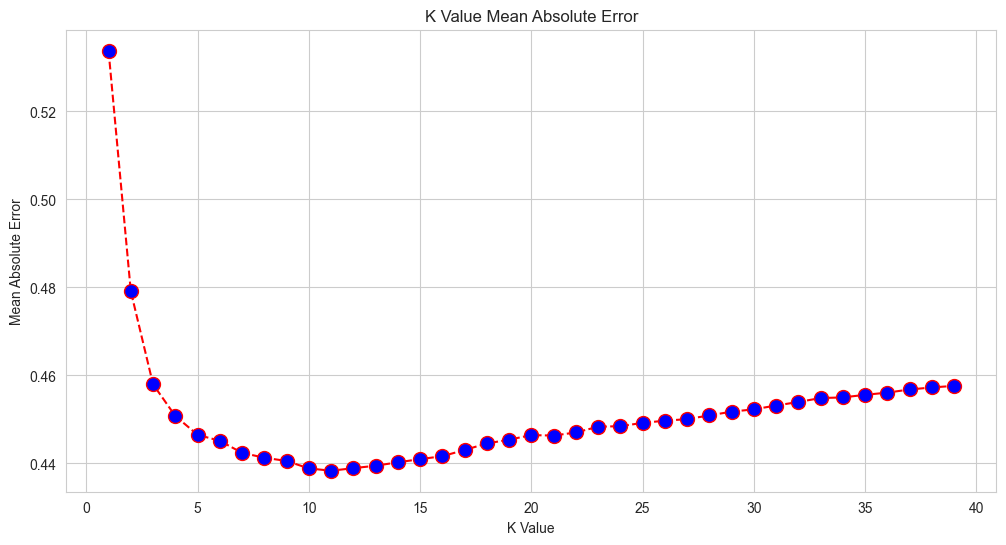

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40),
         error, 
         color='red',
         linestyle='dashed',
         marker='o',    
         markerfacecolor='blue', 
         markersize=10)

plt.title('K Value Mean Absolute Error')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

In [16]:
import numpy as np

min_err = np.array(error).argmin() + 1

print(min(error))
print(min_err)

0.4383553340086916
11


In [17]:
knn_reg12 = KNeighborsRegressor(n_neighbors=min_err)
knn_reg12.fit(X_train, y_train)
y_pred12 = knn_reg12.predict(X_test)
r2 = knn_reg12.score(X_test, y_test)

mae12 = mean_absolute_error(y_test, y_pred12)
mse12 = mean_squared_error(y_test, y_pred12)
rmse12 = mean_squared_error(y_test, y_pred12, squared=False)
print(f'r2: {r2}, \nmae: {mae12} \nmse: {mse12} \nrmse: {rmse12}')

r2: 0.686863973635168, 
mae: 0.4383553340086916 
mse: 0.41100359380530116 
rmse: 0.6410956198612662


In [18]:
from sklearn.svm import SVR

svr_lin = SVR(kernel='linear')

In [19]:
y_train.ravel()

array([1.938, 1.697, 2.598, ..., 2.221, 2.835, 3.25 ])

In [20]:
svr_lin.fit(X_train, y_train)

SVR(kernel='linear')

In [21]:
y_pred = svr_lin.predict(X_test)

In [22]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
rmse = float(format(np.sqrt(mse), '.3f'))
print("\nRMSE: ", rmse)

Mean Squared Error: 0.5543747635048074

RMSE:  0.745


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


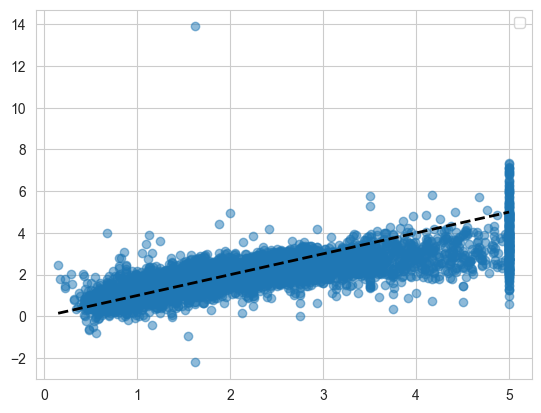

In [23]:
plt.scatter(y_test, y_pred, alpha=0.5) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.legend() 
plt.show() 

In [24]:
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train, y_train.ravel())

SVR()

In [25]:
y_pred = svr_rbf.predict(X_test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mean Squared Error: 0.3495519334234576

RMSE:  0.591


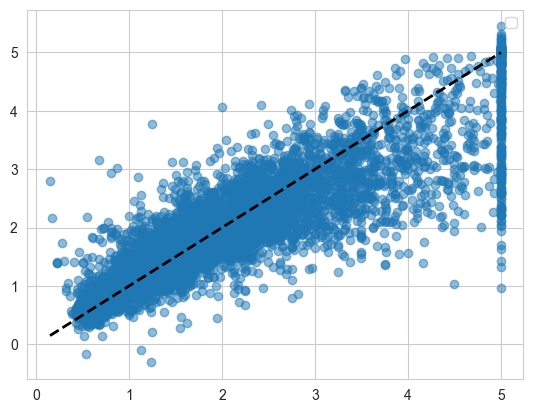

In [26]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
rmse = float(format(np.sqrt(mse), '.3f'))
print("\nRMSE: ", rmse)

plt.scatter(y_test, y_pred, alpha=0.5) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.legend() 
plt.show() 

In [27]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = linear_model.predict(X_test)

In [29]:
pred_score = linear_model.score(X_train, y_train)
print(pred_score)

0.609345972797216


In [30]:
r2 = linear_model.score(X_test, y_test)
mae12 = mean_absolute_error(y_test, y_pred)
mse12 = mean_squared_error(y_test, y_pred)
rmse12 = mean_squared_error(y_test, y_pred, squared=False)
print(f'r2: {r2}, \nmae: {mae12} \nmse: {mse12} \nrmse: {rmse12}')

r2: 0.5957702326061665, 
mae: 0.5272474538305952 
mse: 0.5305677824766752 
rmse: 0.7284008391515452


In [31]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(max_depth=5, random_state=2222)
model = dt_reg.fit(X_train, y_train)

In [32]:
y_pred = model.predict(X_test)

In [33]:
print(dt_reg.score(X_test, y_test))

0.6029986793705844


In [34]:
r2 = model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'r2: {r2}, \nmae: {mae} \nmse: {mse} \nrmse: {rmse}')

r2: 0.6029986793705844, 
mae: 0.5275606849936627 
mse: 0.5210801561811794 
rmse: 0.7218588201173269


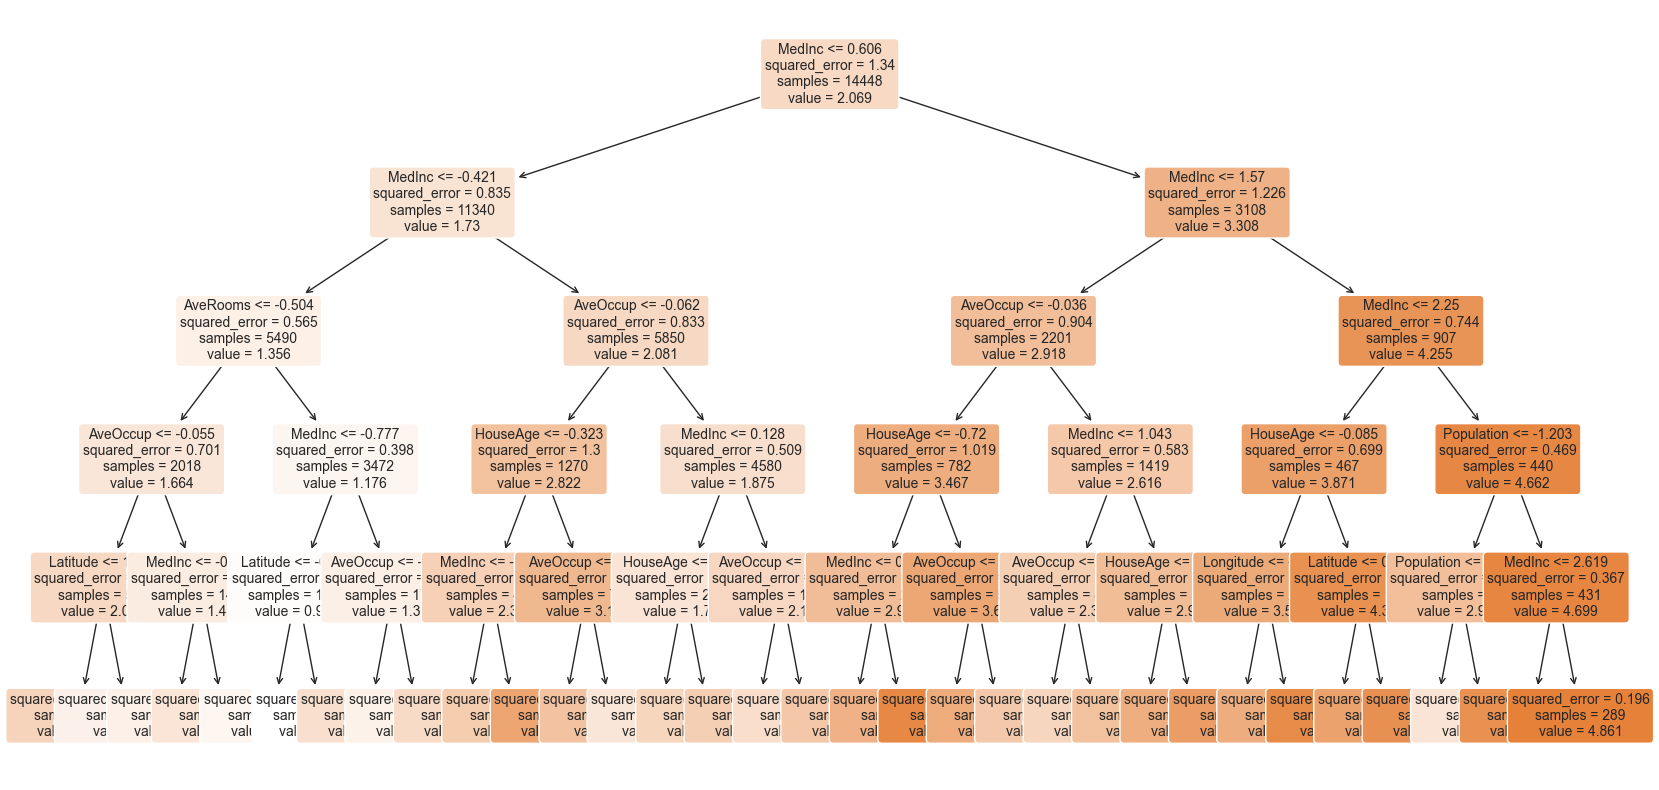

In [35]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_reg, filled=True, feature_names=california_housing.feature_names, rounded=True, fontsize=10)
plt.show()

In [36]:
from sklearn.ensemble import RandomForestRegressor

rndf_reg = RandomForestRegressor(n_estimators=20, random_state=42)
rndf_reg.fit(X_train, y_train)
y_pred = rndf_reg.predict(X_test)

In [37]:
r2 = model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'r2: {r2}, \nmae: {mae} \nmse: {mse} \nrmse: {rmse}')

r2: 0.6029986793705844, 
mae: 0.34056831782945735 
mse: 0.2673755320282252 
rmse: 0.5170836799089923


In [38]:
y = df['MedHouseVal']

In [39]:
df["MedHouseValCat"] = pd.qcut(df["MedHouseVal"], 4, retbins=False, labels=[1, 2, 3, 4])

In [40]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedHouseValCat
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,4
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,4
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,4
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,4


In [41]:
y = df['MedHouseValCat']
X = df.drop(['MedHouseVal', 'MedHouseValCat'], axis=1)
data = df.drop(['MedHouseVal'], axis=1)

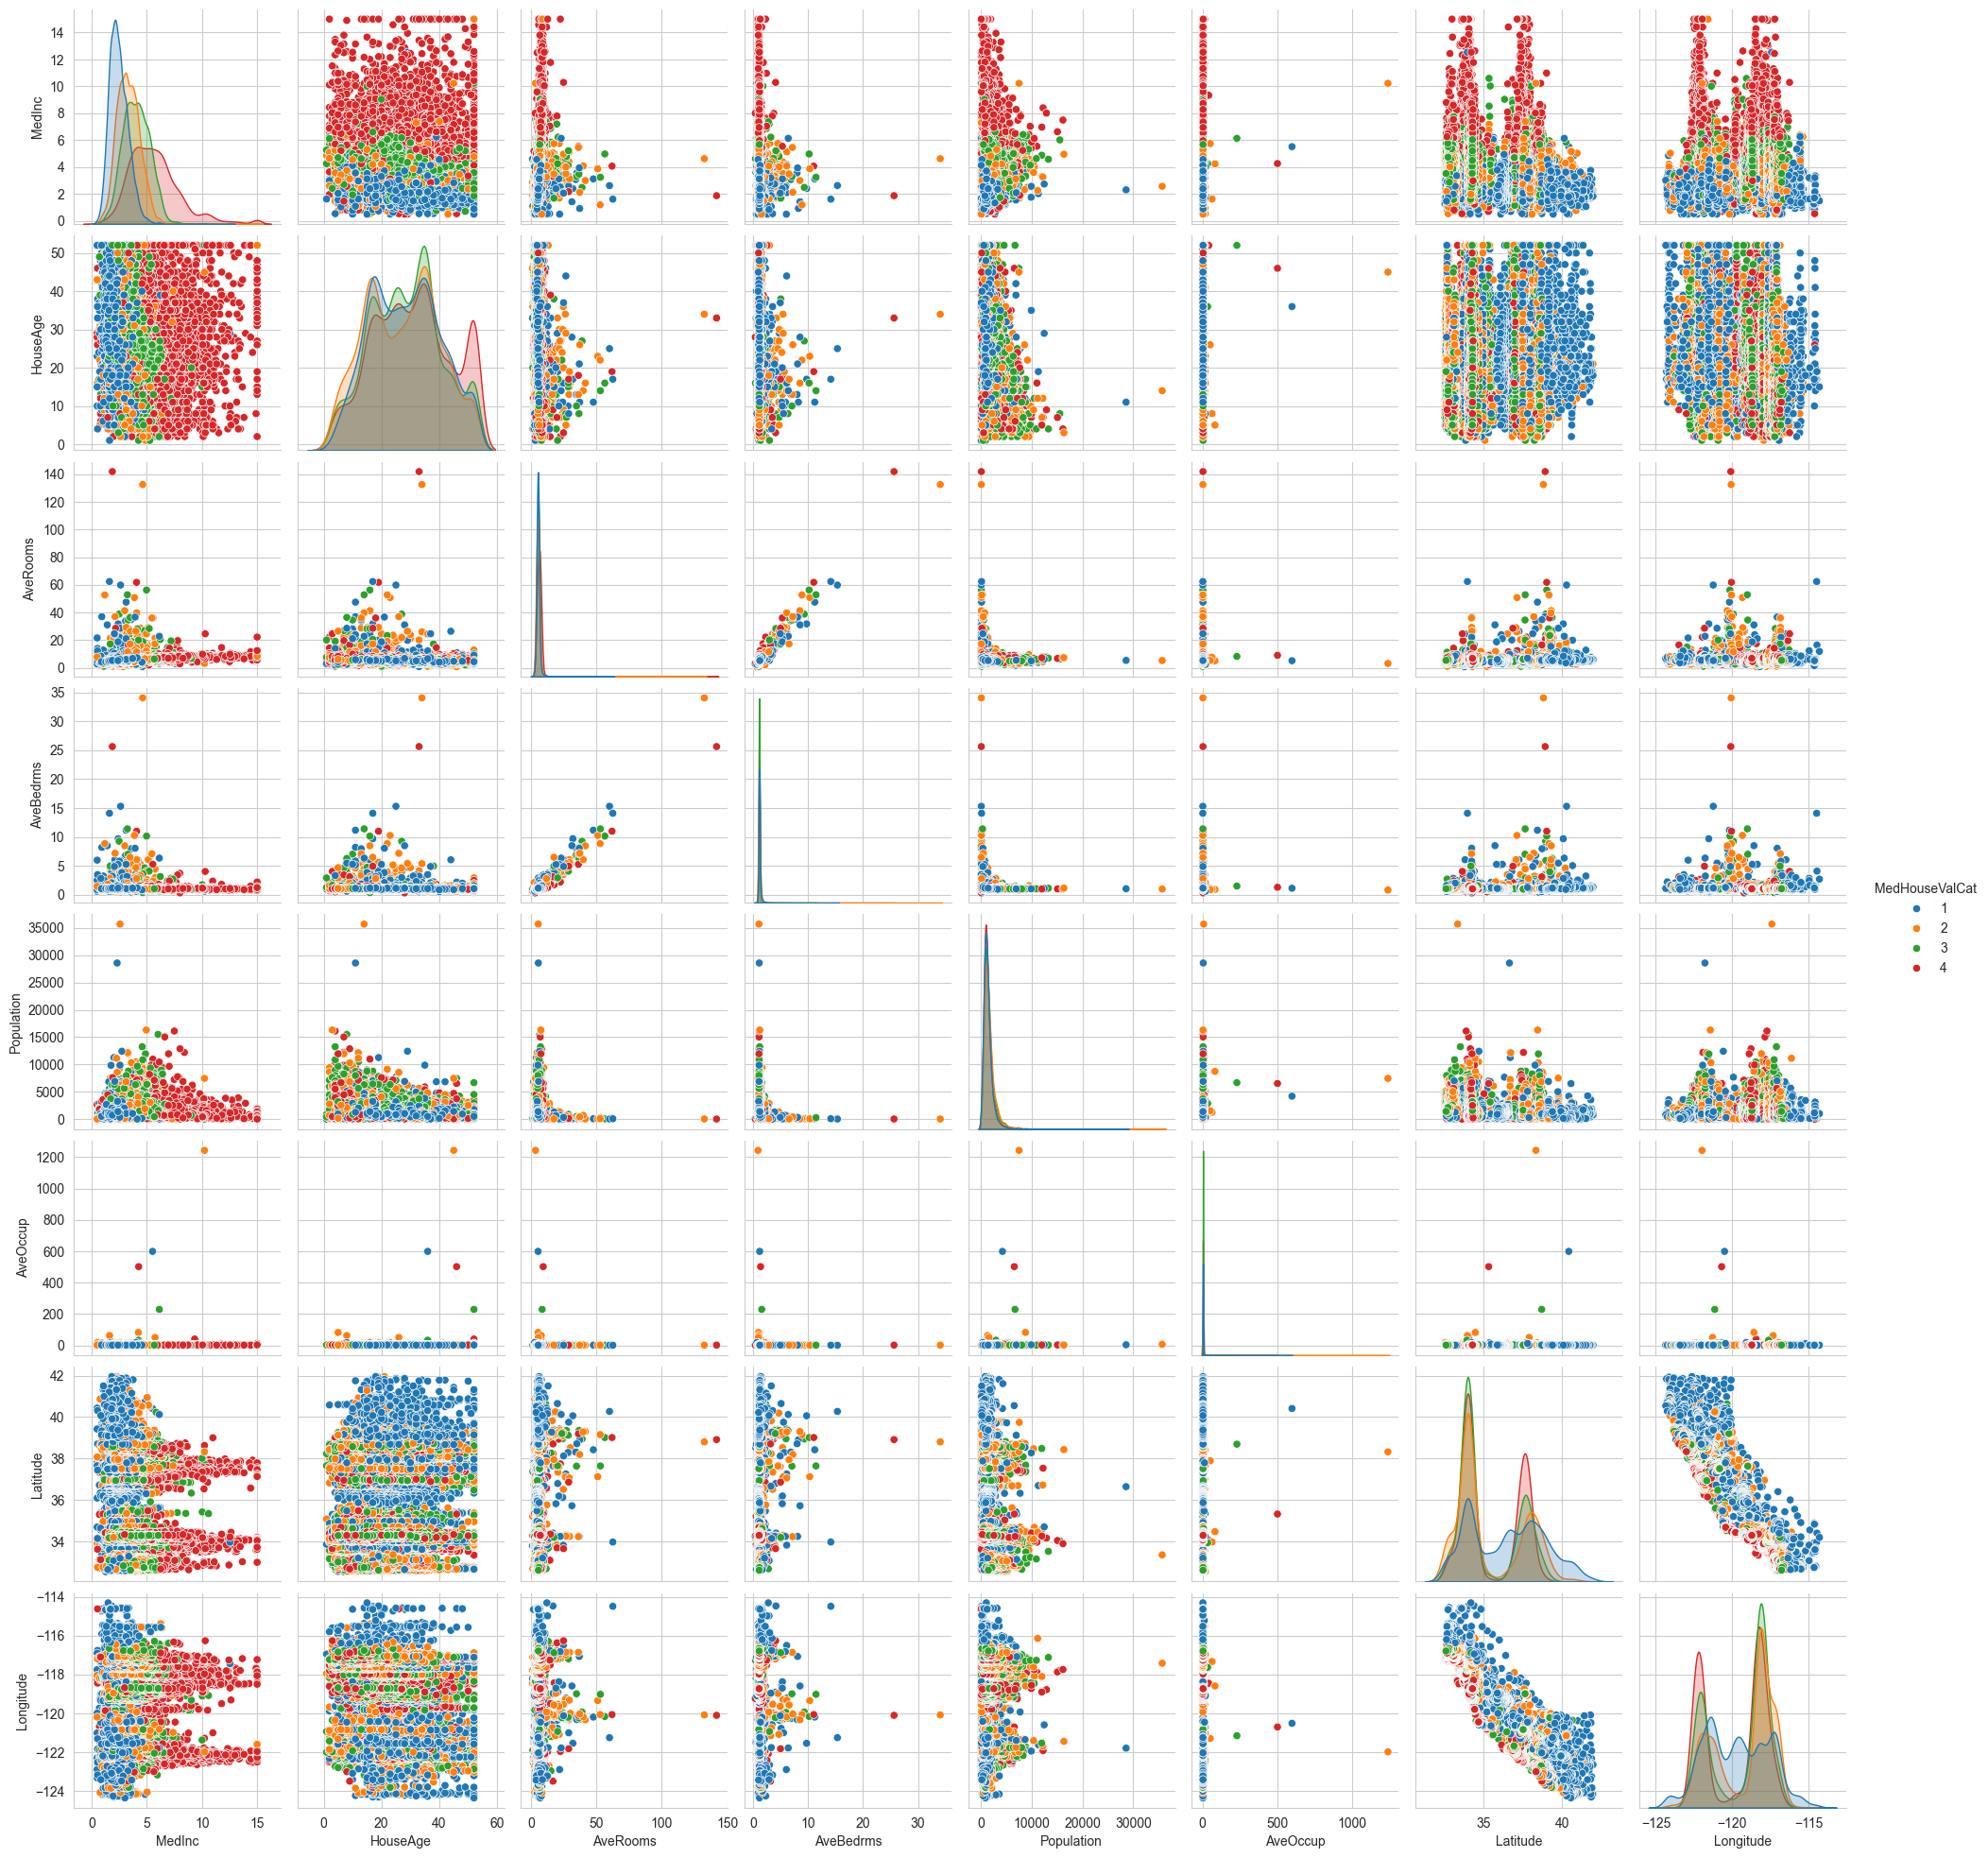

In [42]:
import seaborn as sns

g=sns.pairplot(data, hue="MedHouseValCat")
plt.show()

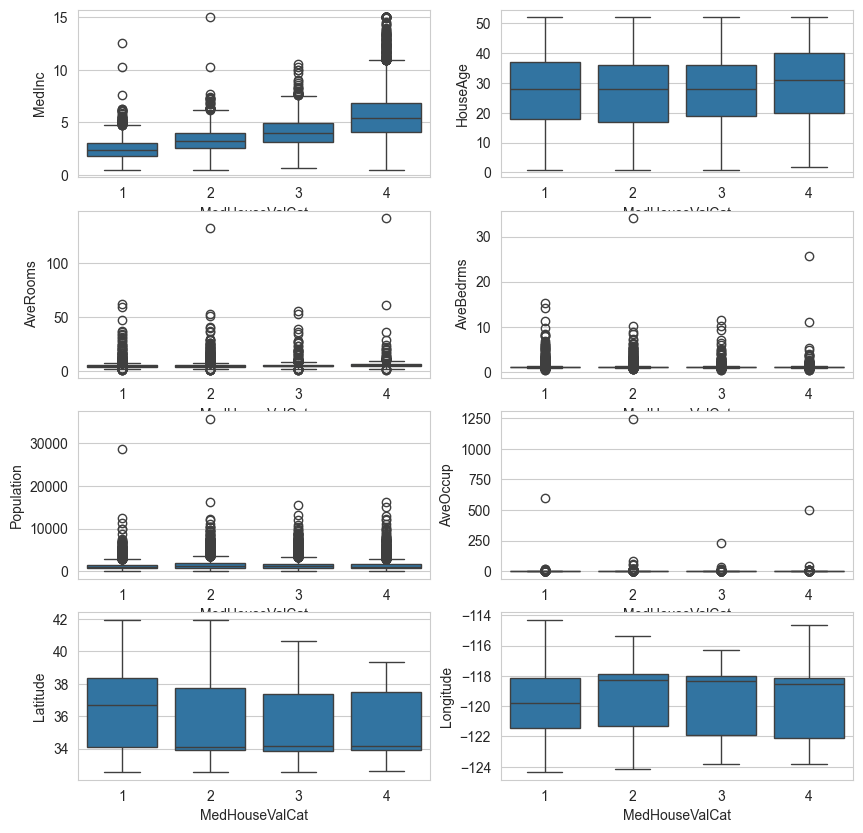

In [43]:
plt.figure(figsize=(10,10))
plt.subplot(4,2,1)
sns.boxplot(x='MedHouseValCat',y='MedInc',data=data)
plt.subplot(4,2,2)
sns.boxplot(x='MedHouseValCat',y='HouseAge',data=data)
plt.subplot(4,2,3)
sns.boxplot(x='MedHouseValCat',y='AveRooms',data=data)
plt.subplot(4,2,4)
sns.boxplot(x='MedHouseValCat',y='AveBedrms',data=data)
plt.subplot(4,2,5)
sns.boxplot(x='MedHouseValCat',y='Population',data=data)
plt.subplot(4,2,6)
sns.boxplot(x='MedHouseValCat',y='AveOccup',data=data)
plt.subplot(4,2,7)
sns.boxplot(x='MedHouseValCat',y='Latitude',data=data)
plt.subplot(4,2,8)
sns.boxplot(x='MedHouseValCat',y='Longitude',data=data)
plt.show()

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, yc_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
yc_pred = classifier.predict(X_test)

In [48]:
acc = classifier.score(X_test, yc_test)
print(acc)

0.6191860465116279


In [49]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [50]:
classes_names = ['categeory 1', 'categeory 2', 'categeory 3', 'categeory 4']
cm = pd.DataFrame(confusion_matrix(yc_test, yc_pred), columns=classes_names, index=classes_names)

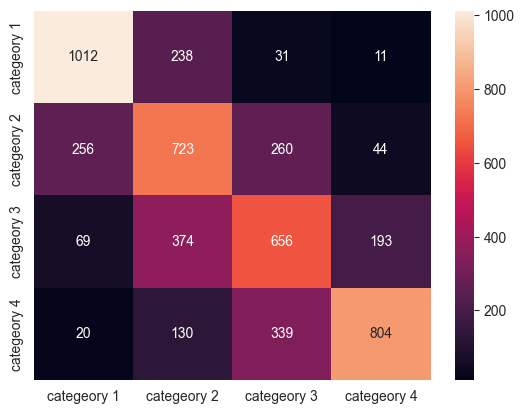

In [51]:
sns.heatmap(cm, annot=True, fmt='d');

In [52]:
cp = classification_report(yc_test, yc_pred)
print(cp)

              precision    recall  f1-score   support

           1       0.75      0.78      0.76      1292
           2       0.49      0.56      0.53      1283
           3       0.51      0.51      0.51      1292
           4       0.76      0.62      0.69      1293

    accuracy                           0.62      5160
   macro avg       0.63      0.62      0.62      5160
weighted avg       0.63      0.62      0.62      5160


In [53]:
from sklearn.metrics import f1_score

f1s = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    f1s.append(f1_score(yc_test, pred_i, average='weighted'))

In [54]:
f1s

[0.5959780413228685,
 0.5844649415859822,
 0.6002770840986955,
 0.6159013698103392,
 0.6214029156601969,
 0.6206431482386768,
 0.625128547651564,
 0.6295756318733444,
 0.6327485281861941,
 0.6320830510468147,
 0.6336943415309274,
 0.6337562537512907,
 0.634280319459088,
 0.6352901649122223,
 0.636173746799575,
 0.6322548460759989,
 0.6338533459869821,
 0.6328642736335579,
 0.6325578319277866,
 0.6280343643273183,
 0.6279648967014434,
 0.62572837914478,
 0.6287309942245827,
 0.6239231407295662,
 0.6269343940512319,
 0.6252793062502322,
 0.6279654387092263,
 0.6253738946698241,
 0.6261664863215046,
 0.6275579280530419,
 0.6297551291702513,
 0.6260835796162245,
 0.6222945845186534,
 0.6236025087984881,
 0.6174821235452114,
 0.6201416177072232,
 0.6213051843219822,
 0.6213075565930068,
 0.6212419447698982]

In [55]:
print(max(f1s))
best_idx = f1s.index(max(f1s))
print(best_idx)

0.636173746799575
14


In [56]:
best_case = best_idx + 1
knnC = KNeighborsClassifier(n_neighbors=best_case)
knnC.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [57]:
y_pred = knnC.predict(X_test)

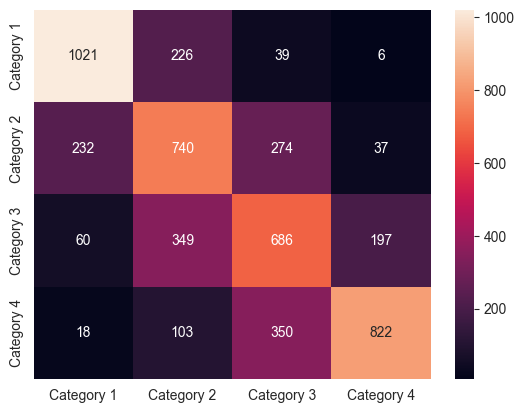

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

classes_names = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
cm = pd.DataFrame(confusion_matrix(yc_test, y_pred), columns=classes_names, index=classes_names)

sns.heatmap(cm, annot=True, fmt='d');

In [59]:
print(classification_report(yc_test, y_pred))

              precision    recall  f1-score   support

           1       0.77      0.79      0.78      1292
           2       0.52      0.58      0.55      1283
           3       0.51      0.53      0.52      1292
           4       0.77      0.64      0.70      1293

    accuracy                           0.63      5160
   macro avg       0.64      0.63      0.64      5160
weighted avg       0.64      0.63      0.64      5160


In [60]:
from sklearn.svm import SVC

classifier = SVC(kernel='rbf', random_state=0)

In [61]:
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [62]:
y_pred = classifier.predict(X_test)

            Category 1  Category 2  Category 3  Category 4
Category 1        1019         233          35           5
Category 2         241         740         276          26
Category 3          48         280         764         200
Category 4          16          51         335         891
              precision    recall  f1-score   support

           1       0.77      0.79      0.78      1292
           2       0.57      0.58      0.57      1283
           3       0.54      0.59      0.57      1292
           4       0.79      0.69      0.74      1293

    accuracy                           0.66      5160
   macro avg       0.67      0.66      0.66      5160
weighted avg       0.67      0.66      0.66      5160


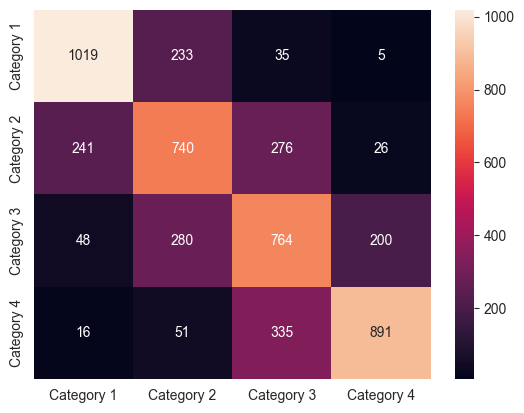

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

classes_names = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
cm = pd.DataFrame(confusion_matrix(yc_test, y_pred), columns=classes_names, index=classes_names)

sns.heatmap(cm, annot=True, fmt='d');

print(cm)
print(classification_report(yc_test, y_pred))

In [64]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(yc_test, y_pred)
print('accuracy_score', acc)

accuracy_score 0.6616279069767442


In [65]:
lin_classifier = SVC(kernel='linear', random_state=0)
y_pred = lin_classifier.fit(X_train, y_train).predict(X_test)

            Category 1  Category 2  Category 3  Category 4
Category 1         979         260          46           7
Category 2         296         649         301          37
Category 3          63         286         702         241
Category 4          27          40         330         896
              precision    recall  f1-score   support

           1       0.72      0.76      0.74      1292
           2       0.53      0.51      0.52      1283
           3       0.51      0.54      0.53      1292
           4       0.76      0.69      0.72      1293

    accuracy                           0.63      5160
   macro avg       0.63      0.62      0.63      5160
weighted avg       0.63      0.63      0.63      5160


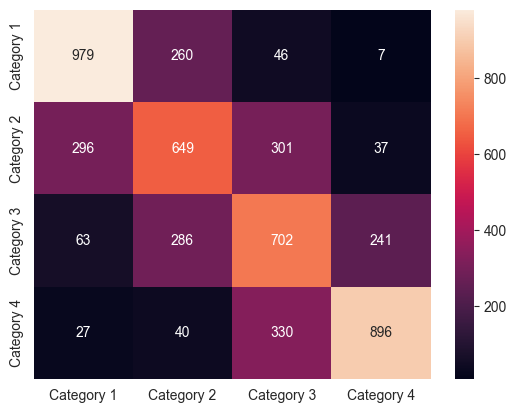

In [66]:
from sklearn.metrics import classification_report, confusion_matrix

classes_names = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
cm = pd.DataFrame(confusion_matrix(yc_test, y_pred), columns=classes_names, index=classes_names)

sns.heatmap(cm, annot=True, fmt='d');

print(cm)
print(classification_report(yc_test, y_pred))

In [67]:
acc = accuracy_score(yc_test, y_pred)
print('accuracy_score', acc)

accuracy_score 0.6251937984496124


In [68]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(criterion="gini", max_depth=12, random_state=42, min_samples_leaf=9)
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

            Category 1  Category 2  Category 3  Category 4
Category 1        1006         219          51          16
Category 2         227         749         258          49
Category 3          50         267         765         210
Category 4          22          61         267         943
              precision    recall  f1-score   support

           1       0.77      0.78      0.77      1292
           2       0.58      0.58      0.58      1283
           3       0.57      0.59      0.58      1292
           4       0.77      0.73      0.75      1293

    accuracy                           0.67      5160
   macro avg       0.67      0.67      0.67      5160
weighted avg       0.67      0.67      0.67      5160


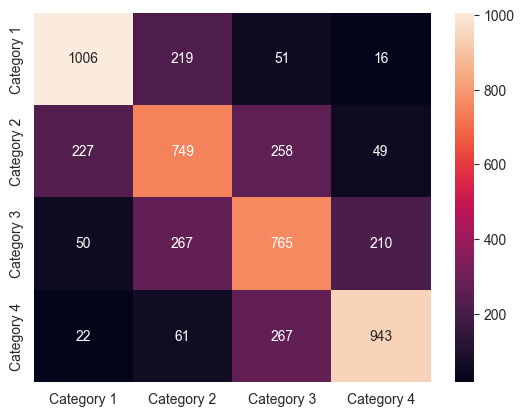

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

classes_names = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
cm = pd.DataFrame(confusion_matrix(yc_test, y_pred), columns=classes_names, index=classes_names)

sns.heatmap(cm, annot=True, fmt='d');

print(cm)
print(classification_report(yc_test, y_pred))

In [70]:
accuracy_score(yc_test, y_pred)

0.671124031007752

In [71]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

            Category 1  Category 2  Category 3  Category 4
Category 1        1080         188          17           7
Category 2         211         848         202          22
Category 3          28         235         864         165
Category 4          11          33         211        1038
              precision    recall  f1-score   support

           1       0.81      0.84      0.82      1292
           2       0.65      0.66      0.66      1283
           3       0.67      0.67      0.67      1292
           4       0.84      0.80      0.82      1293

    accuracy                           0.74      5160
   macro avg       0.74      0.74      0.74      5160
weighted avg       0.74      0.74      0.74      5160


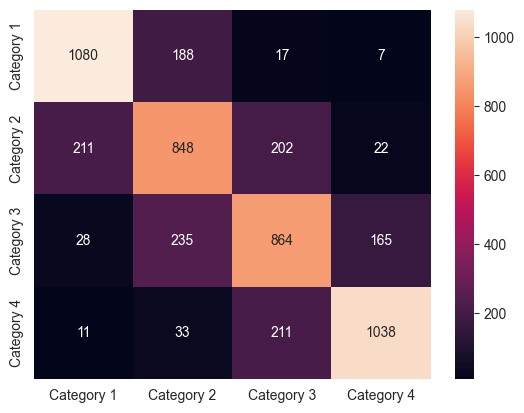

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

classes_names = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
cm = pd.DataFrame(confusion_matrix(yc_test, y_pred), columns=classes_names, index=classes_names)

sns.heatmap(cm, annot=True, fmt='d');

print(cm)
print(classification_report(yc_test, y_pred))

In [73]:
sc = accuracy_score(yc_test, y_pred)
print(sc)

0.7422480620155039


In [74]:
from sklearn.naive_bayes import BernoulliNB

bnb_clf = BernoulliNB()

bnb_clf.fit(X_train, y_train)

BernoulliNB()

In [75]:
y_pred = bnb_clf.predict(X_test)

In [76]:
score = accuracy_score(y_pred, yc_test)
score

0.4680232558139535

            Category 1  Category 2  Category 3  Category 4
Category 1         835         374          26          57
Category 2         381         539         159         204
Category 3         238         350         206         498
Category 4         167         133         158         835
              precision    recall  f1-score   support

           1       0.52      0.65      0.57      1292
           2       0.39      0.42      0.40      1283
           3       0.38      0.16      0.22      1292
           4       0.52      0.65      0.58      1293

    accuracy                           0.47      5160
   macro avg       0.45      0.47      0.44      5160
weighted avg       0.45      0.47      0.44      5160


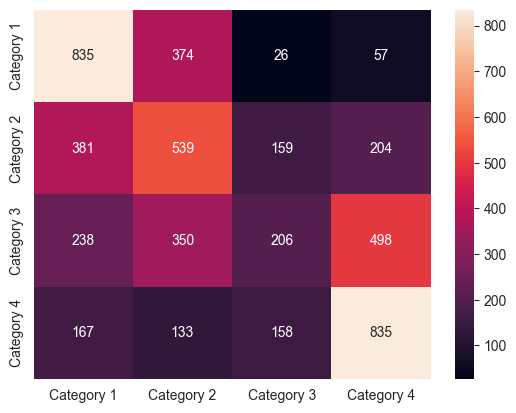

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

classes_names = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
cm = pd.DataFrame(confusion_matrix(yc_test, y_pred), columns=classes_names, index=classes_names)

sns.heatmap(cm, annot=True, fmt='d');

print(cm)
print(classification_report(yc_test, y_pred))

In [78]:
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

y_pred = gnb_clf.predict(X_test)

In [79]:
print(accuracy_score(yc_test, y_pred))

0.4251937984496124


In [80]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.fit_transform(X_test)

from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

mnb.fit(X_scaled_train, y_train)

y_pred = mnb.predict(X_scaled_test)

            Category 1  Category 2  Category 3  Category 4
Category 1         743         538           8           3
Category 2         387         784          72          40
Category 3         270         572         291         159
Category 4         199         206         269         619
              precision    recall  f1-score   support

           1       0.46      0.58      0.51      1292
           2       0.37      0.61      0.46      1283
           3       0.45      0.23      0.30      1292
           4       0.75      0.48      0.59      1293

    accuracy                           0.47      5160
   macro avg       0.51      0.47      0.47      5160
weighted avg       0.51      0.47      0.47      5160


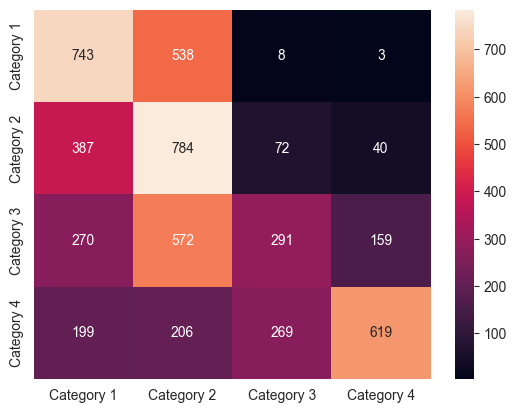

In [81]:
from sklearn.metrics import classification_report, confusion_matrix

classes_names = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
cm = pd.DataFrame(confusion_matrix(yc_test, y_pred), columns=classes_names, index=classes_names)

sns.heatmap(cm, annot=True, fmt='d');

print(cm)
print(classification_report(yc_test, y_pred))

In [82]:
accuracy = accuracy_score(yc_test, y_pred)
accuracy

0.47228682170542635